In [6]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/USArrests.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/iris.csv

--2025-06-26 07:46:20--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/USArrests.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1308 (1.3K) [text/plain]
Saving to: ‘USArrests.csv’

USArrests.csv       100%[===================>]   1.28K  --.-KB/s    in 0s      

2025-06-26 07:46:20 (56.3 MB/s) - ‘USArrests.csv’ saved [1308/1308]

--2025-06-26 07:46:20--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
S

# Machine_Learning2_clustering


In [8]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['KneeLocator', 'clusteval'])


KneeLocator is already installed.
clusteval is already installed.


In [9]:
## 필요 모듈 임포트
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 군집화

## 계층적 군집화

#### 데이터 읽기

In [10]:
rd = pd.read_csv('USArrests.csv')
rd.head(10)

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California
5,7.9,204,78,38.7,Colorado
6,3.3,110,77,11.1,Connecticut
7,5.9,238,72,15.8,Delaware
8,15.4,335,80,31.9,Florida
9,17.4,211,60,25.8,Georgia


In [11]:
df = rd.copy()

In [12]:
from sklearn.preprocessing import StandardScaler


## 데이터 표준화
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.iloc[:, :4])
df_scaled[:30]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [13]:
from scipy.cluster.hierarchy import linkage

## 계층적 군집화 수행
linkage_matrix = linkage(df_scaled, # 표준화된 데이터
                                                    method = 'ward', # 연결법, 'complete', 'average', 'weighted', 'centroid'
                                                    metric = 'euclidean')
# linkage_matrix 계층적 군집화 결과

linkage_matrix[:10]

array([[14.        , 28.        ,  0.2079438 ,  2.        ],
       [12.        , 31.        ,  0.35377437,  2.        ],
       [13.        , 15.        ,  0.43312429,  2.        ],
       [22.        , 48.        ,  0.49909939,  2.        ],
       [19.        , 30.        ,  0.54082482,  2.        ],
       [35.        , 52.        ,  0.55914837,  3.        ],
       [36.        , 46.        ,  0.59956023,  2.        ],
       [18.        , 50.        ,  0.66258522,  3.        ],
       [45.        , 49.        ,  0.71097658,  2.        ],
       [40.        , 47.        ,  0.71809843,  2.        ]])

### 덴드로그램


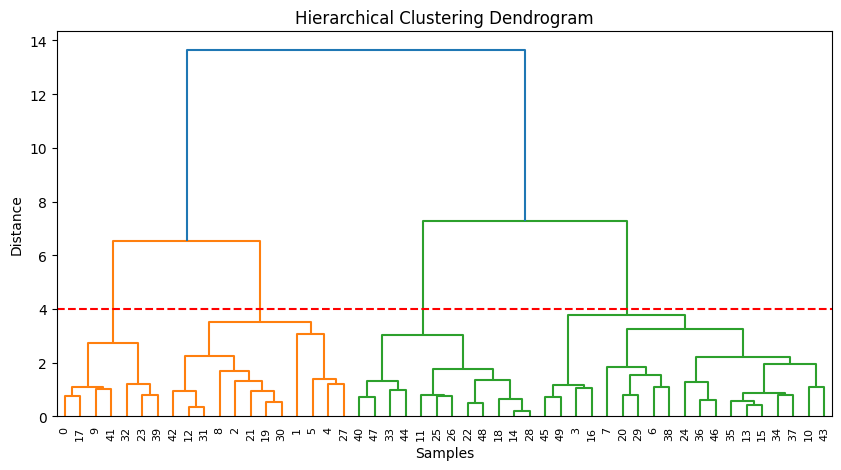

In [14]:
from scipy.cluster.hierarchy import  dendrogram

## 덴드로그램 그리기
plt.figure(figsize = (10, 5)) # 가로, 세로 인치..

dendrogram(linkage_matrix,
                           orientation = 'top',  # 'right', 등등
                           # color_threshold = 1.5 # 이 값 기준으로 자동 색 할당
                             )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

plt.axhline(y = 4, color = 'r', linestyle = '--')  # 높이 4에서 군집 분할

plt.show() ## 자동 색 할당..

In [15]:
## 참고: 동일하나, Scikit-learn 클래스 사용, 덴드로그램 지원안함
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters = 3)
cluster_labels = clusterer.fit_predict(df_scaled)
cluster_labels

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1])

In [16]:
from scipy.cluster.hierarchy import  fcluster

## 클러스터 나누기
##1. 높이로 나누기
# clusters = fcluster(Z = linkage_matrix,
#                                       t = 4,    # 클러스터를 나눌 높이
#                                       criterion = 'distance'    # or 'inconsistent'
# )

## 2. 개수로 지정하기
clusters = fcluster(Z = linkage_matrix,
                                      t = 4,    # 생성할 클러스터의 최대 개수
                                      criterion = 'maxclust'
)


## 클러스터 개수 확인
np.unique(clusters, return_counts=True)

(array([1, 2, 3, 4], dtype=int32), array([ 7, 12, 12, 19]))

In [17]:
## 클러스터 결과를 데이터프레임에 추가
df.insert(0, 'Cluster', clusters) ## 첫번째 위치에 추가
df.head(10)

,Cluster,Murder,Assault,UrbanPop,Rape,State
0,1,13.2,236,58,21.2,Alabama
1,2,10.0,263,48,44.5,Alaska
2,2,8.1,294,80,31.0,Arizona
3,4,8.8,190,50,19.5,Arkansas
4,2,9.0,276,91,40.6,California
5,2,7.9,204,78,38.7,Colorado
6,4,3.3,110,77,11.1,Connecticut
7,4,5.9,238,72,15.8,Delaware
8,2,15.4,335,80,31.9,Florida
9,1,17.4,211,60,25.8,Georgia


In [18]:
df['Cluster'].value_counts()

,count
Cluster,
4,19
2,12
3,12
1,7


In [19]:
##  결과 확인
df2 = df.iloc[:, :5]
df2.groupby('Cluster').mean()  # 각 클러스터별 평균값 확인

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
1,14.671429,251.285714,54.285714,21.685714
2,10.966667,264.000000,76.500000,33.608333
3,3.091667,76.000000,52.083333,11.833333
4,6.210526,142.052632,71.263158,19.184211


### 결과 시각화

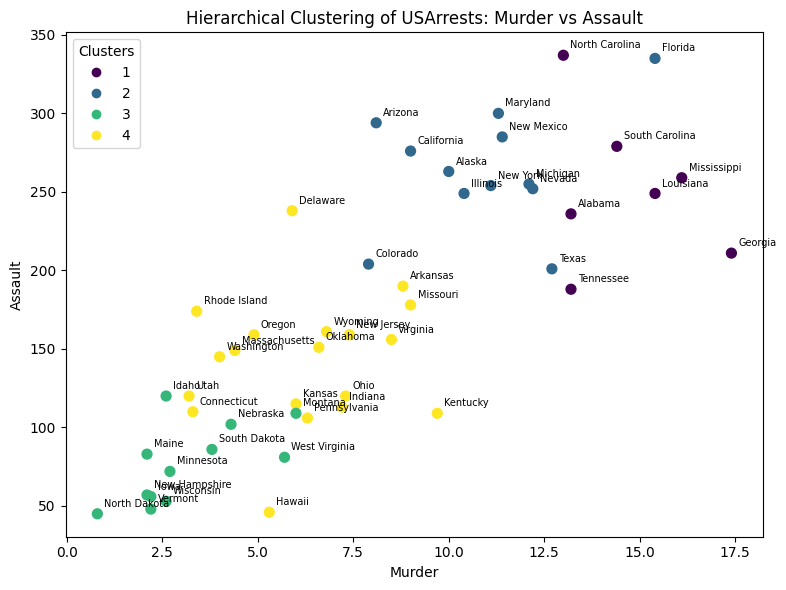

In [20]:
## 시각화로 결과 확인
plt.figure(figsize=(8, 6))

## 산점도
scatter = plt.scatter(df['Murder'], df['Assault'], c=df['Cluster'], cmap='viridis', s=50)

## 레이블 추가
for i, txt in enumerate(df['State']):
    plt.annotate(txt,
                               (df['Murder'][i], df['Assault'][i]),
                               xytext = (5, 5),  #  기준점에서의 텍스트 위치 오프셋
                               textcoords = 'offset points', # 약간 떨어져서 그리기
                               fontsize = 7)

plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('Hierarchical Clustering of USArrests: Murder vs Assault')

## 범례 추가
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")


plt.tight_layout()
plt.show()

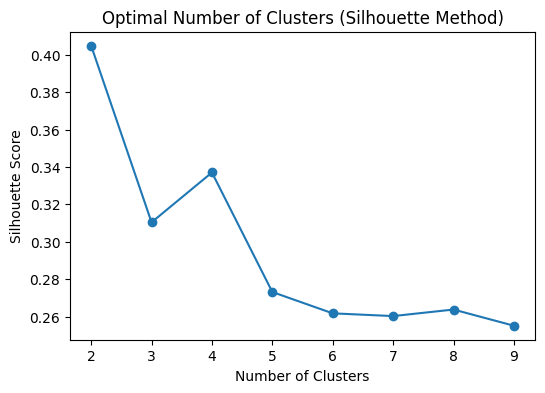

In [21]:
# !pip install --upgrade kneed

from sklearn.metrics import silhouette_score

## 다양한 군집 개수에 대한 실루엣 점수 계산
silhouette_scores = []
for k in range(2, 10):  # 군집 개수 2부터 9까지 확인
    clusters = fcluster(Z = linkage_matrix,
                                          t = k,
                                          criterion = 'maxclust')
    score = silhouette_score(df_scaled, clusters)  # 실루엣 점수 계산
    silhouette_scores.append(score)

## 실루엣 점수 시각화
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Optimal Number of Clusters (Silhouette Method)')
plt.show()


In [22]:
## 최적 값으로 변경
optimal_k = 5

clusters = fcluster(linkage_matrix,
                                     t = optimal_k,
                                     criterion = 'maxclust')
clusters

array([1, 2, 2, 4, 2, 2, 5, 5, 2, 1, 5, 3, 2, 5, 3, 5, 4, 1, 3, 2, 5, 2,
       3, 1, 5, 3, 3, 2, 3, 5, 2, 2, 1, 3, 5, 5, 5, 5, 5, 1, 3, 1, 2, 5,
       3, 4, 5, 3, 3, 4], dtype=int32)

In [23]:
## 최적의 군집 개수에 대한 높이 값 계산
optimal_height = linkage_matrix[-(optimal_k - 1),  2]
optimal_height

np.float64(3.772026252105819)

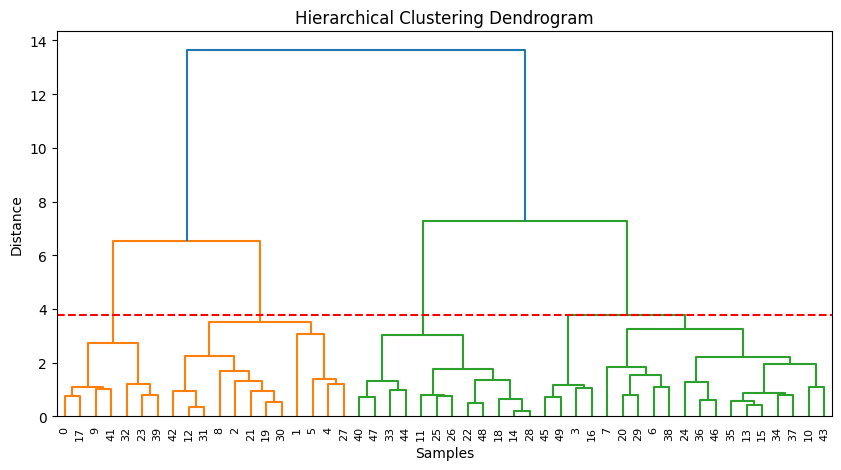

In [24]:
## 다시 덴드로그램 그리기
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')

plt.axhline(y = optimal_height, color='r', linestyle='--')
plt.show()


### 실루엣 계수

In [25]:
from sklearn.metrics import silhouette_samples

## 실루엣 계수 계산(개별)
silhouette_vals = silhouette_samples(X = df_scaled,
                                                                              labels = clusters)  # 각 데이터 포인트의 실루엣 계수
silhouette_vals

array([ 0.32348842,  0.05445535,  0.40592654,  0.43835422,  0.43176587,
        0.28896628,  0.1985857 ,  0.0064528 ,  0.24618514,  0.4229949 ,
        0.33674547,  0.31383838,  0.23829913, -0.20008175,  0.53206177,
       -0.07824645,  0.40831937,  0.37517609,  0.51871834,  0.07343859,
        0.41884147,  0.40887406,  0.1997699 ,  0.4208282 , -0.07162054,
       -0.21209772,  0.05844866,  0.4279937 ,  0.54333551,  0.35421334,
        0.31737139,  0.34437304,  0.33073922,  0.50417986,  0.25598198,
       -0.0815844 ,  0.0872196 ,  0.16405805,  0.29689959,  0.48279721,
        0.39667254,  0.11347762,  0.17841738,  0.41207928,  0.37233806,
        0.33655275,  0.29655273,  0.25590185,  0.32133282,  0.38615595])

In [26]:
from sklearn.metrics import silhouette_score

## 실루엣 계수 계산(전체)

silhouette_avg = silhouette_score(X = df_scaled, # 표준화된 데이터
                                                                       labels =clusters) # 예측된 클래스 레이블

print('Silhouette Score:', silhouette_avg) ## 1에 가까울 수록 좋음

Silhouette Score: 0.2731109448720741


In [27]:
df.head(2)

,Cluster,Murder,Assault,UrbanPop,Rape,State
0,1,13.2,236,58,21.2,Alabama
1,2,10.0,263,48,44.5,Alaska


### 참고
- 새로운 데이터가 들어왔을때, 기존 학습된 모델로 군집 할당 하기
- predict 함수가 없기 때문에 따로 구현해줘야 함..



In [28]:
new_data = np.array([[9.1, 34, 59, 10]]) # df.columns 참고

In [29]:
## 계층적 군집화 수행(사전)




In [30]:
from sklearn.metrics.pairwise import pairwise_distances_argmin_min

## 각 클러스터의 중심점 계산
centroids = np.array([df.iloc[:, 1:5][clusters == i].mean(axis=0) for i in range(1, optimal_k + 1)])
centroids

array([[ 14.67142857, 251.28571429,  54.28571429,  21.68571429],
       [ 10.96666667, 264.        ,  76.5       ,  33.60833333],
       [  3.09166667,  76.        ,  52.08333333,  11.83333333],
       [  8.45      , 154.        ,  56.25      ,  18.025     ],
       [  5.61333333, 138.86666667,  75.26666667,  19.49333333]])

In [31]:
## 새로운 데이터에 대해 가장 가까운 클러스터 찾기
closest_cluster_indices, _ = pairwise_distances_argmin_min(new_data, centroids)
closest_cluster_indices

array([2])

## 중심기반 군집화

#### 데이터 읽기

In [32]:
rd = pd.read_csv('iris.csv')
rd.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [33]:
df = rd.copy()

## 데이터 표준화
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.iloc[:, :4])
df_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

### K means

In [34]:
from sklearn.cluster import KMeans

## Kmeans 클러스터링 수행
kmeans = KMeans(n_clusters = 3, # 클러스터 개수(k값)
                                      n_init = 10, # 여러번 반복해서 최적결과 도출
                                      random_state = 1234) # 랜섬 시드

clusters  = kmeans.fit_predict(df_scaled) # 표준화된 데이터 사용

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [35]:
## 클러스터 결과를 데이터프레임에 추가
df = rd.copy()

df.insert(0, 'Cluster', clusters) ## 첫번째 위치에 추가
df.head(10)

,Cluster,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,0,4.9,3.0,1.4,0.2,setosa
2,0,4.7,3.2,1.3,0.2,setosa
3,0,4.6,3.1,1.5,0.2,setosa
4,0,5.0,3.6,1.4,0.2,setosa
5,0,5.4,3.9,1.7,0.4,setosa
6,0,4.6,3.4,1.4,0.3,setosa
7,0,5.0,3.4,1.5,0.2,setosa
8,0,4.4,2.9,1.4,0.2,setosa
9,0,4.9,3.1,1.5,0.1,setosa


In [36]:
## 결과 확인
df2 = df.iloc[:, :5] # Species  제외
df2.groupby('Cluster').mean()  # 각 클러스터별 평균값 확인

,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
0,5.006000,3.428000,1.462000,0.246000
1,6.780851,3.095745,5.510638,1.972340
2,5.801887,2.673585,4.369811,1.413208


### 결과 시각화

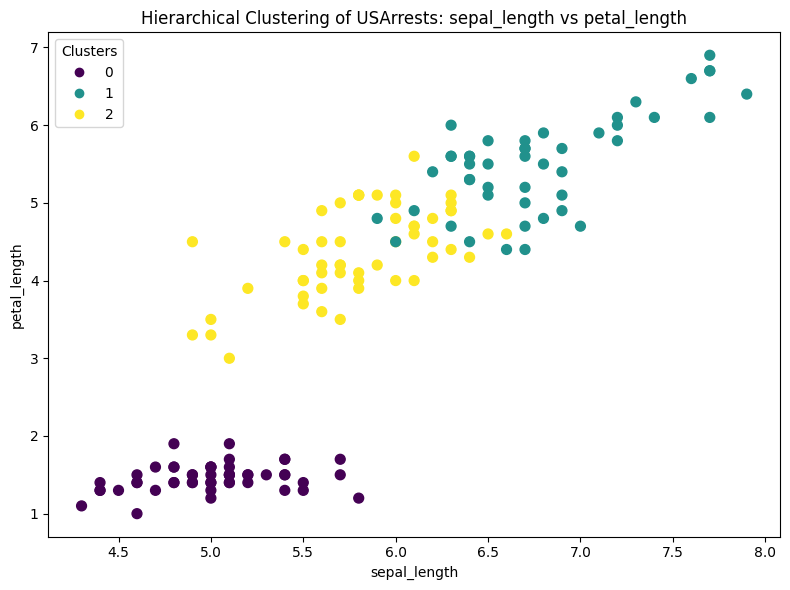

In [37]:
## 시각화로 결과 확인
plt.figure(figsize=(8, 6))

## 산점도
scatter = plt.scatter(df['sepal_length'], df['petal_length'], c=df['Cluster'], cmap='viridis', s=50)

## 레이블 추가
# for i, txt in enumerate(df.index):
#     plt.annotate(txt,
#                               (df['sepal_length'][i], df['petal_length'][i]),
#                               xytext = (5, 5),  #  기준점에서의 텍스트 위치 오프셋
#                               textcoords = 'offset points', # 약간 떨어져서 그리기
#                               fontsize = 5)

plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Hierarchical Clustering of USArrests: sepal_length vs petal_length')

## 범례 추가
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")


plt.tight_layout()
plt.show()

### ARI (Adjusted Rand Index)
- 클러스터링(clustering) 결과의 품질을 평가할 때 사용하는 지표

In [38]:
from sklearn.metrics import adjusted_rand_score

## ARI 계산 (모델 평가)
ari_score = adjusted_rand_score(
                                                                  labels_pred = clusters,  # 예측된 레이블
                                                                  labels_true = rd['species'])    # 실제 레이블


print('Adjusted Rand Index (ARI):', ari_score)  ## 1에 가까울 수록 좋음


Adjusted Rand Index (ARI): 0.6201351808870379


### 실루엣 계수

In [39]:
from sklearn.metrics import silhouette_samples

## 실루엣 계수 계산(개별)
silhouette_vals = silhouette_samples(X = df_scaled,
                                                                              labels = clusters)  # 각 데이터 포인트의 실루엣 계수
silhouette_vals

array([ 0.73419485,  0.56827391,  0.67754724,  0.62050159,  0.72847412,
        0.60988485,  0.69838355,  0.73081691,  0.48821004,  0.63154089,
        0.67418286,  0.72179392,  0.57847213,  0.54944562,  0.55294537,
        0.45806886,  0.62112236,  0.72875221,  0.58590385,  0.67746392,
        0.66042913,  0.69021224,  0.69653476,  0.63737612,  0.70132024,
        0.54494792,  0.70471457,  0.72151031,  0.71451919,  0.66776336,
        0.62562482,  0.64783099,  0.58967022,  0.54088124,  0.62843507,
        0.67614681,  0.66543365,  0.72441906,  0.5526219 ,  0.72470474,
        0.73333453,  0.07766666,  0.63725809,  0.66371521,  0.64863547,
        0.5593465 ,  0.67881722,  0.66606206,  0.68912398,  0.71077363,
        0.34169992,  0.16627565,  0.35854546,  0.54373992,  0.1327061 ,
        0.53878741,  0.23206569,  0.40978046,  0.03768897,  0.54390267,
        0.42467141,  0.34088756,  0.4694655 ,  0.33187646,  0.4951792 ,
        0.18906699,  0.39249659,  0.54918014,  0.40350566,  0.58

In [40]:
from sklearn.metrics import silhouette_score

## 실루엣 계수 계산(전체)
silhouette_avg = silhouette_score(X = df_scaled, # 표준화된 데이터
                                                                       labels = clusters) #  예측된 레이블

print('Silhouette Score:', silhouette_avg) ## 1에 가까울 수록 좋음

Silhouette Score: 0.45994823920518646


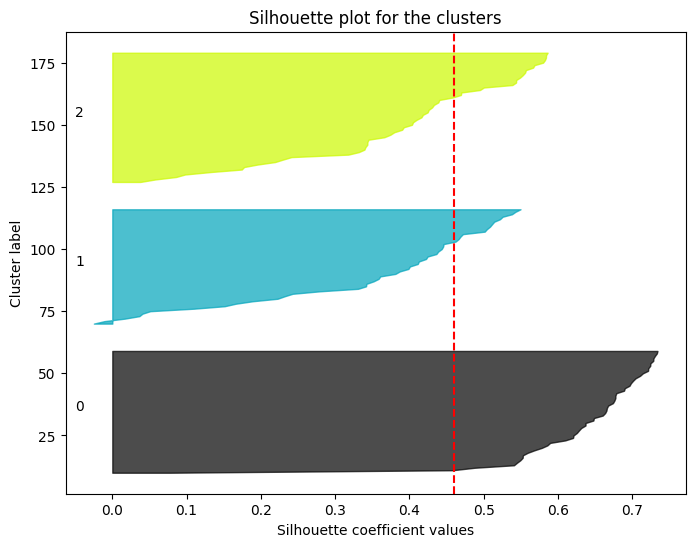

In [41]:
## 실루엣 계수 시각화
plt.figure(figsize=(8, 6))
y_lower = 10

# 클러스터별 실루엣 점수 계산
sample_silhouette_values = silhouette_samples(df_scaled, clusters)

for i in range(3):  # n_clusters=3로 설정한 클러스터 개수
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette plot for the clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.axvline(x = silhouette_avg, color="red", linestyle="--")
plt.show()

In [43]:
## 잘못 군집화된 관측치 찾기
silhouette_df = pd.DataFrame(silhouette_vals)
silhouette_df.columns = ['silhouette_vals']
iris_df_sil = pd.concat([silhouette_df, df], axis=1)

## sil 값이 음수인 관측치..
iris_df_sil[iris_df_sil['silhouette_vals'] < 0]


,silhouette_vals,Cluster,sepal_length,sepal_width,petal_length,petal_width,species
111,-0.010584,1,6.4,2.7,5.3,1.9,virginica
127,-0.024894,1,6.1,3.0,4.9,1.8,virginica


### 최적의 k 찾기

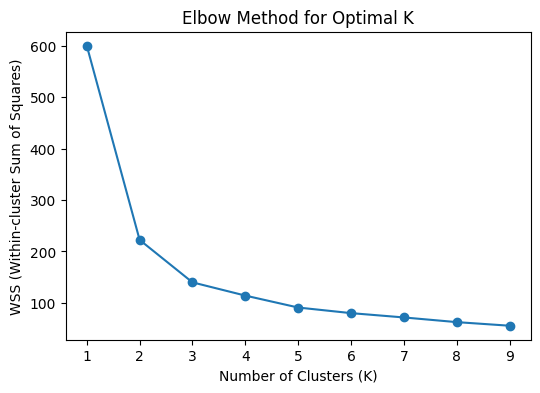

In [46]:
wcss = []

## 여러 개의 K 값에 대해 KMeans 모델을 적합시키고 WCSS 계산
for k in range(1, 10):  # K 값 범위 설정 (1부터 9까지)
    kmeans = KMeans(n_clusters = k,
                                          n_init = 10) ## 반복 횟수
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # inertia_: 클러스터 내 제곱합(WCSS)

## WCSS 시각화
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), wcss, marker = 'o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSS (Within-cluster Sum of Squares)')
plt.show()

In [49]:
!pip install --upgrade kneed

from kneed import KneeLocator

## 최적의 군집 개수 결정
optimal_k = KneeLocator(range(1, 10), wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters:", optimal_k)


Optimal number of clusters: 3


#### 참고

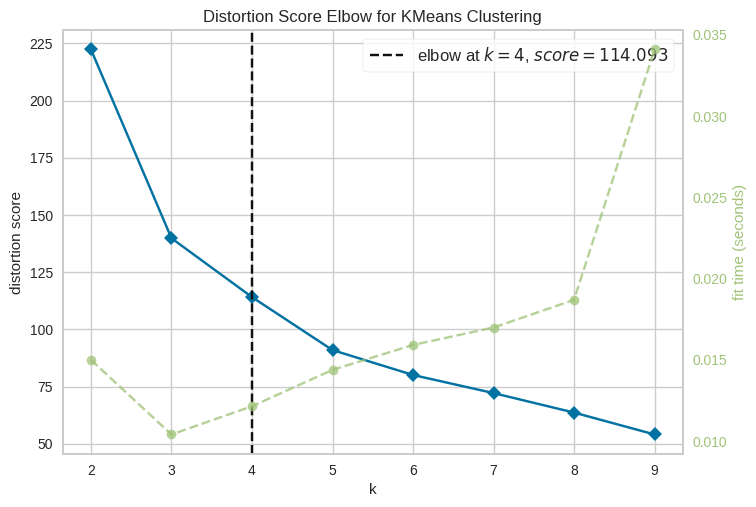

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
# ! pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

# KMeans 모델 생성
model = KMeans(n_init = 10)

# Elbow 방법으로 최적의 k 찾기
visualizer = KElbowVisualizer(model, k=(2,  10))
visualizer.fit(df_scaled)  # X는 데이터
visualizer.show()



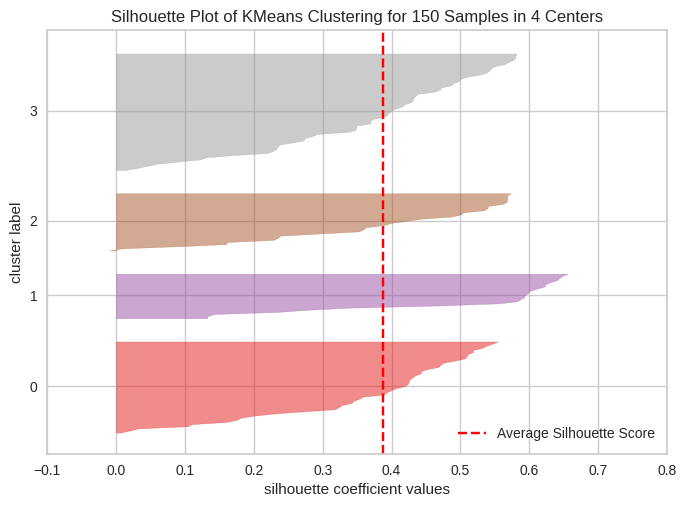

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
## KMeans 모델, k선택
model = KMeans(n_clusters = 4,
                                   n_init = 10, # 여러번 반복해서 최적결과 도출
                                   random_state = 1234,
               )

# SilhouetteVisualizer로 실루엣 분석 시각화
visualizer = SilhouetteVisualizer(model)
visualizer.fit(df_scaled)  # X는 데이터
visualizer.show()

In [53]:
!pip install clusteval

from clusteval import clusteval

# 클러스터 평가 객체 생성
ce = clusteval()

# 데이터를 이용한 자동 클러스터링 평가
results = ce.fit(df_scaled)  # X는 데이터

# 최적의 클러스터 결과 출력
print(results['labx'])# 각 데이터 포인트의 클러스터 할당(레이블)
print(results['score'])# 군집화 평가 점수
print(results['evaluate'])# 군집화에 사용된 기준


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 14.6 MB/s eta 0:00:00


[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 562.29it/s]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
    cluster_threshold  clusters     score
0                   2         2  0.577035
1                   3         3  0.446689
2                   4         4  0.400636
3                   5         5  0.330587
4                   6         6  0.314855
5                   7         7  0.316970
6                   8         8  0.310947
7                   9         9  0.311434
8                  10        10  0.316112
9                  11        11  0.299006
10                 12        12  0.305072
11                 13        13  0.317297
12                 14        14  0.316529
13                 15        15  0.320289
14                 16        16  0.327926
15                 17 

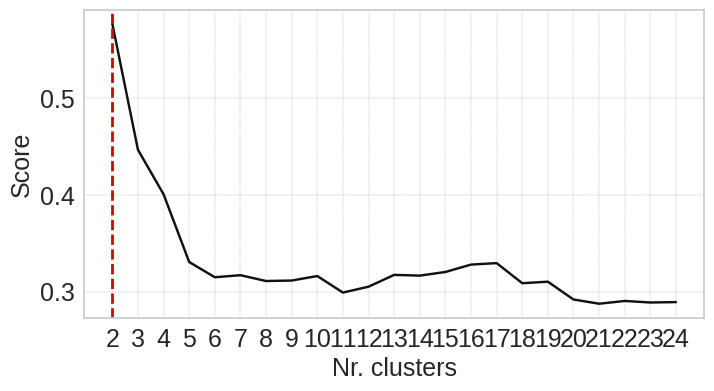

(<Figure size 800x400 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [54]:
## 군집화 결과 시각화, silhouette
ce.plot(figsize=(8, 4))

### 참고


In [55]:
## 새로운 데이터가 들어왔을때, 기존 학습된 모델로 군집 할당 하기
## 새로운 데이터!,
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
new_data = np.array([[6.1,  3.5,  3.2,  3]])

In [56]:
## Kmeans
kmeans = KMeans(n_clusters = 3,
                                      n_init = 10) ## 반복 횟수
clusters  = kmeans.fit_predict(df_scaled)


## 새로운 데이터 표준화 (기존 scaler 사용!!!)
new_data_scaled = scaler.transform(new_data)


## 새로운 데이터의 군집 할당
new_clusters = kmeans.predict(new_data_scaled)
new_clusters

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

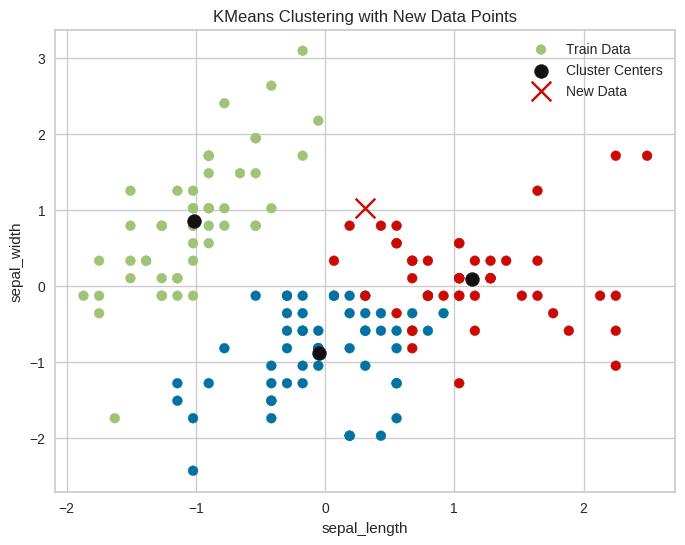

In [57]:
## 시각화
colors = ['C0', 'C1', 'C2']  # 기본 색상 리스트
point_colors = [colors[x] for x in clusters]  # 각 클러스터 할당에 따라 색상 지정


plt.figure(figsize=(8, 6))
## 기존 데이터의 군집 시각화
plt.scatter(df_scaled[:, 0], df_scaled[:, 1],
                     s = 50,
                     c =  point_colors ,
                     # cmap = '',
                     marker = 'o',
                     label = 'Train Data')


## 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                      s = 100,
                      c = 'k' ,
                      marker = 'o',
                      label = 'Cluster Centers')



## 새로운 데이터의 군집 시각화
plt.scatter(new_data_scaled[:, 0], new_data_scaled[:, 1],
                     c =colors[new_clusters[0]],
                     marker = 'x',
                     s =200,
                     label='New Data')


plt.title('KMeans Clustering with New Data Points')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

## 밀도기반 군집화

#### 데이터 읽기

In [58]:
## iris data 사용

### DBSCAN

In [59]:
from sklearn.cluster import DBSCAN

## DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps = 1, # 최적의 반경,
                                      min_samples = 5  # 최소 샘플 수
                                       # metric = 'euclidean' ...
                                         )

dbscan.fit(df_scaled) # 표준화된 데이터를

## 클러스터 할당 결과
clusters = dbscan.labels_
clusters # -1: Noise를 의미!

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [60]:
from sklearn.neighbors import NearestNeighbors

## 최적의 eps, minpt 찾기

## k-최근접 이웃으로 거리 계산
k = 5
neighbors = NearestNeighbors(n_neighbors = k)  # minPts를 대략적으로 설정, 일반적으로 데이터의 차원+1로 설정
neighbors_fit = neighbors.fit(df_scaled) # 표준화 데이터
distances, indices = neighbors_fit.kneighbors(df_scaled) # 표준화 데이터
distances, indices

(array([[0.        , 0.13163218, 0.13383627, 0.18772101, 0.23710977],
        [0.        , 0.16614339, 0.17890971, 0.17890971, 0.23710977],
        [0.        , 0.13383627, 0.17051228, 0.28389113, 0.31104122],
        [0.        , 0.23710977, 0.24891184, 0.2662756 , 0.28389113],
        [0.        , 0.17890971, 0.26013882, 0.27119749, 0.29154628],
        [0.        , 0.22734971, 0.44502517, 0.44994717, 0.46408451],
        [0.        , 0.29828781, 0.39599996, 0.47884156, 0.49719351],
        [0.        , 0.12116787, 0.23710977, 0.24891184, 0.24891184],
        [0.        , 0.23710977, 0.33774794, 0.52337301, 0.55247084],
        [0.        , 0.13163218, 0.18772101, 0.2662756 , 0.27119749],
        [0.        , 0.12116787, 0.43399991, 0.44882402, 0.44994717],
        [0.        , 0.17051228, 0.24891184, 0.29828781, 0.35304268],
        [0.        , 0.17890971, 0.26326437, 0.2662756 , 0.28851266],
        [0.        , 0.21196853, 0.33774794, 0.50412335, 0.50684599],
        [0.        ,

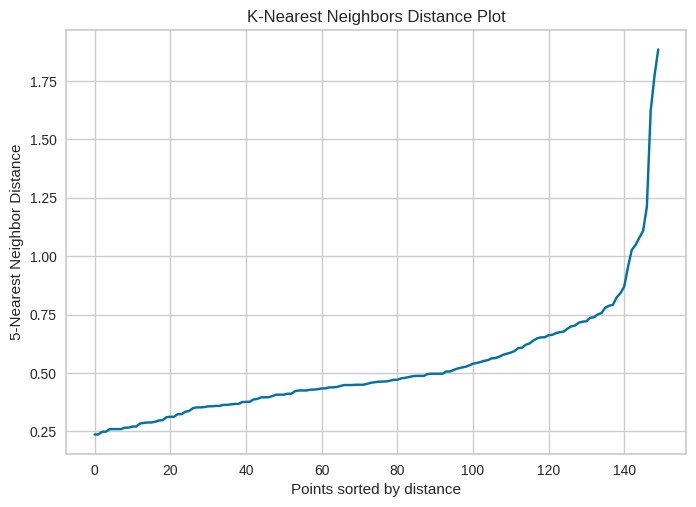

In [61]:
## 디스탄스 플롯 생성
distances = np.sort(distances[:, 4])  # n_neighbors = 5에서의 거리만 정렬(다섯번째 컬럼), # 각 데이터 포인트에서 다섯 번째 가까운 이웃까지의 거리만 선택
plt.plot(distances)
plt.title('K-Nearest Neighbors Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel(str(k)+ '-Nearest Neighbor Distance')
plt.show()

In [62]:
## 최적의 eps 값을 선택
optimal_eps = distances[np.argmax(np.diff(distances, 2))]  # 거리 곡선의 최대 기울기 지점 (엘보우)
print("Optimal eps: ", optimal_eps)

Optimal eps:  1.1080668356303596


In [63]:
## DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps = optimal_eps,  #  최적의 반경
                                       min_samples = 20)  #최소 샘플 수
dbscan.fit(df_scaled) # 표준화된 데이터

# 클러스터 할당 결과
clusters = dbscan.labels_
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [64]:
# 클러스터 결과 확인
df_new = pd.DataFrame(df, columns=df.columns)
df_new['Cluster'] = clusters
df_new.head(10)

,Cluster,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,0,4.9,3.0,1.4,0.2,setosa
2,0,4.7,3.2,1.3,0.2,setosa
3,0,4.6,3.1,1.5,0.2,setosa
4,0,5.0,3.6,1.4,0.2,setosa
5,0,5.4,3.9,1.7,0.4,setosa
6,0,4.6,3.4,1.4,0.3,setosa
7,0,5.0,3.4,1.5,0.2,setosa
8,0,4.4,2.9,1.4,0.2,setosa
9,0,4.9,3.1,1.5,0.1,setosa


In [65]:
df_new.iloc[:, :5].groupby('Cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
-1,6.700000,3.38000,4.560000,1.440000
0,5.002083,3.43125,1.464583,0.241667
1,6.215464,2.85567,4.851546,1.660825


### 결과 시각화

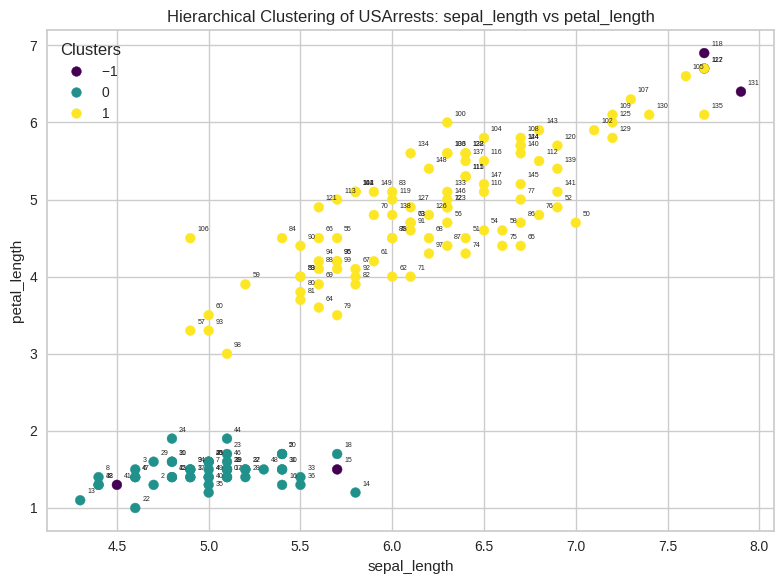

In [66]:
## 시각화로 결과 확인
plt.figure(figsize=(8, 6))

## 산점도그리기
scatter = plt.scatter(df_new['sepal_length'], df_new['petal_length'], c=df_new['Cluster'], cmap='viridis', s=50)

## 레이블 추가
for i, txt in enumerate(df_new.index):
    plt.annotate(txt,
                              (df_new['sepal_length'][i], df_new['petal_length'][i]),
                              xytext = (5, 5),  #  기준점에서의 텍스트 위치 오프셋
                              textcoords = 'offset points', # 약간 떨어져서 그리기
                              fontsize = 5)

plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Hierarchical Clustering of USArrests: sepal_length vs petal_length')

## 범례 추가
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")


plt.tight_layout()
plt.show()

### ARI

In [67]:
from sklearn.metrics import adjusted_rand_score

## ARI 계산
ari_score = adjusted_rand_score(df['species'], clusters)
print('Adjusted Rand Index (ARI):', ari_score)

Adjusted Rand Index (ARI): 0.5417255289899165


### 실루엣 계수

In [68]:
from sklearn.metrics import silhouette_score

## 실루엣 계수 계산
silhouette_avg = silhouette_score(df_scaled, clusters)
print('Silhouette Score:',  silhouette_avg)

Silhouette Score: 0.5330329087184308


### 참고
- 새로운 데이터가 들어왔을때, 기존 학습된 모델로 군집 할당 하기
- predict 함수가 없기 때문에 따로 구현해줘야 함..


In [69]:
## 새로운 데이터가 들어왔을때, 기존 학습된 모델로 군집 할당 하기

df.head(3)

,Cluster,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,0,4.9,3.0,1.4,0.2,setosa
2,0,4.7,3.2,1.3,0.2,setosa


In [70]:
new_data = np.array([[5.1, 3.5, 1.4, 0.2],
                                              [4.7, 3.2, 1.3, 0.2]])

In [71]:
## 클러스터의 중심점 계산
cluster_centers = [df.iloc[:, 1:5][clusters == i].mean(axis=0) for i in set(clusters) if i != -1]  # -1은 노이즈 제외

## 새로운 데이터에 대해 가장 가까운 클러스터 찾기
neigh = NearestNeighbors(n_neighbors = 1)
neigh.fit(cluster_centers)
closest_cluster = neigh.kneighbors(new_data, return_distance=False)

closest_cluster

array([[0],
       [0]])

In [72]:
# EOS